In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import seaborn as sn
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import roc_curve

# Partie 1 : Machine Learning

##### les données non nettoyés

In [2]:
#on importe les données sous forme de data-frame
dataframe =pd.read_csv(r'C:\Users\ASMAE\Downloads\diabetes.csv', encoding="iso-8859-1")
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
new_dataframe=dataframe[['Pregnancies'
                         ,'Glucose',
                         'BloodPressure',
                         'SkinThickness',
                         'Insulin',
                         'BMI',
                         'DiabetesPedigreeFunction',
                         'Age'
                        ]]

In [5]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
new_dataframe['Pregnancies'] = new_dataframe['Pregnancies'].astype(float)
new_dataframe['Glucose'] = new_dataframe['Glucose'].astype(float)
new_dataframe['BloodPressure'] = new_dataframe['BloodPressure'].astype(float)
new_dataframe['SkinThickness'] = new_dataframe['SkinThickness'].astype(float)
new_dataframe['Insulin'] = new_dataframe['Insulin'].astype(float)
new_dataframe['Age'] = new_dataframe['Age'].astype(float)

<ipython-input-6-b6945b4bc904>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['Pregnancies'] = new_dataframe['Pregnancies'].astype(float)
<ipython-input-6-b6945b4bc904>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['Glucose'] = new_dataframe['Glucose'].astype(float)
<ipython-input-6-b6945b4bc904>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [7]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [8]:
y=dataframe[['Outcome']]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

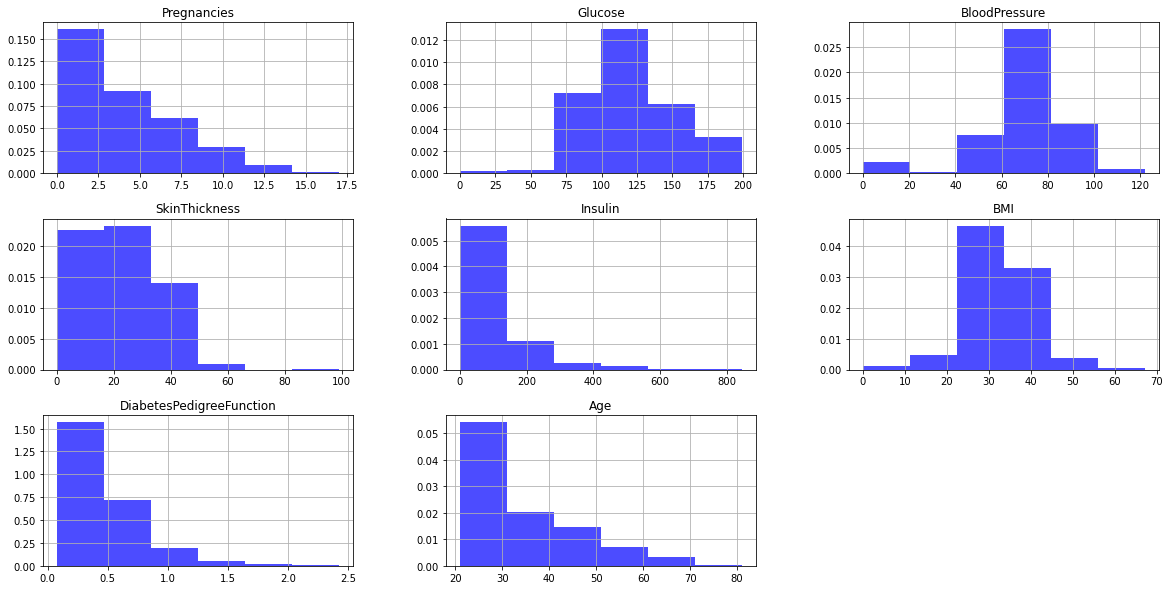

In [9]:
new_dataframe.hist(bins=6,figsize=(20,10),density=1,color='blue',alpha=0.7)

In [10]:
# On convertie notre dataframe en matrice afin de pouvoir la scaler
new_dataframe_matrix = new_dataframe.values

new_dataframe_matrix

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
# preprocessing a comme role de uninanimer nos données, si par exemple on des données en cm et d'autres dm, après le 
# preprocessing ces données deviennent pareilles, ceci est très important pour ne pas influencer nos resultats
scaler = preprocessing.StandardScaler().fit(new_dataframe_matrix)
scaler

StandardScaler()

In [12]:
#moyenne
scaler.mean_

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [13]:
#médiane
scaler.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

In [14]:
dataframe_scaled = scaler.transform(new_dataframe_matrix)
dataframe_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

#### Histogramme après normalisation des données


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

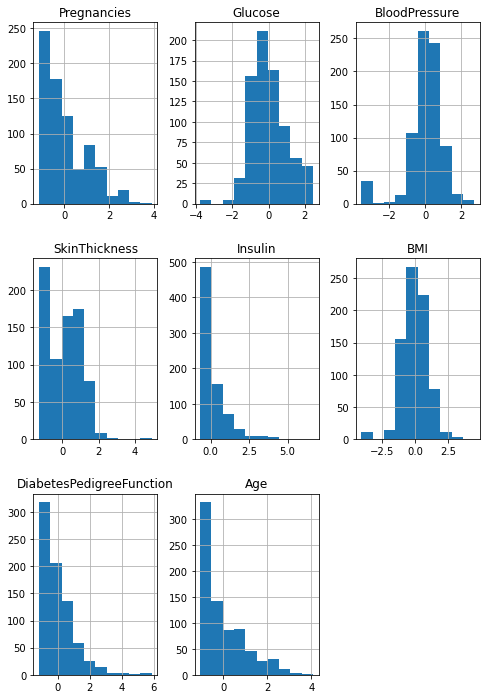

In [16]:
histed=pd.DataFrame(dataframe_scaled,columns=['Pregnancies'
                         ,'Glucose',
                         'BloodPressure',
                         'SkinThickness',
                         'Insulin',
                         'BMI',
                         'DiabetesPedigreeFunction',
                         'Age'])
histed.info()
histed.hist(figsize=(8,12))

### ii. split des données


In [17]:
x_train, x_test, y_train, y_test = train_test_split(new_dataframe, y, train_size=0.8)

In [18]:
y_train

,Outcome
157,0
385,0
113,0
605,0
131,1
...,...
189,1
510,1
244,0
168,0


In [19]:
y.value_counts()

Outcome
0          500
1          268
dtype: int64

### iii.Les différentes modélisations

## 1. La regression logistique

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.pipeline import make_pipeline

In [21]:
logreg = SGDClassifier(loss="log", max_iter=1000,eta0=0.0001)
logreg.fit(x_train,y_train)

C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(eta0=0.0001, loss='log')

#### Matrice de confusion (Logistical Rgeression)

In [22]:
y_pred = logreg.predict(x_test)

In [23]:
cm_log = confusion_matrix(y_test, y_pred)
cm_log

array([[78, 20],
       [29, 27]], dtype=int64)

Text(42.0, 0.5, 'Truth')

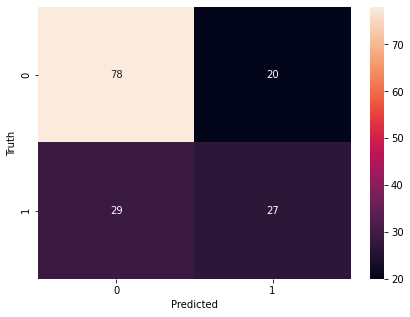

In [24]:
plt.figure(figsize=(7,5))
sn.heatmap(cm_log, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### on calcule des mesures necessaires 

##### on calcule accuracy : accuracy = TP/(TP+FP)

In [27]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.6818181818181818

In [28]:
rappel = metrics.recall_score(y_test,y_pred)
rappel

0.48214285714285715

In [29]:
#La précision
precision = metrics.precision_score(y_test,y_pred)
precision

0.574468085106383

In [30]:
error = 1 - logreg.score(x_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.318182


## 2.Modèle Ridge

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

rid = Ridge(10).fit(x_train, y_train)
rid.score(x_test,y_test)

0.30531127875844877

#### ** Le modèle Ridge est un modèle qui n'est utile que lorsqu’il y a une corrélation entre les variables de notre dataset et donc il marche parfaitement beaucoup de variables car la probabilité d’avoir des variables corrélées est grande.

#### --> Pour démontrer ça on calcule la corrélation entre toutes les variables de notre dataset, et d'après le schéma ci-dessous on remarque que il n ya pas une grande relation entre ces derniers, en plus le nbre de nos entrées n'est pas très important, donc le score n'est pas très satisfaisant

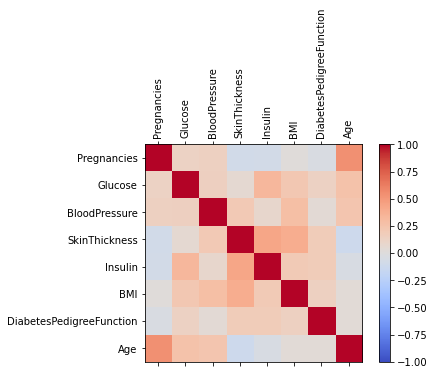

In [32]:
corr = new_dataframe.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(new_dataframe.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(new_dataframe.columns)#
ax.set_yticklabels(new_dataframe.columns)
plt.show()

## les zones en gris montrent que la corrélation est très faible

In [33]:
corr.mean()
# ce qui explique pourquoi le score est très faible

Pregnancies                 0.205504
Glucose                     0.286582
BloodPressure               0.269097
SkinThickness               0.260292
Insulin                     0.265538
BMI                         0.285985
DiabetesPedigreeFunction    0.211036
Age                         0.245132
dtype: float64

### maintenant on doit convertir notre problème en un problème de classification binaire pour avoir un y_predict qui varie entre 0 et 1

#### pour cela on utilise le RidgeClassifier

In [34]:
from sklearn.linear_model import RidgeClassifier

In [35]:
rc = RidgeClassifier()
print(rc)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=None, solver='auto',
                tol=0.001)

RidgeClassifier()


RidgeClassifier(normalize=True)

In [36]:
rc.fit(x_train, y_train)
score = rc.score(x_test, y_test)
print("Score: ", score)

Score:  0.7662337662337663


C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
y_predRidge = rc.predict(x_test)
y_predRidge

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
      dtype=int64)

#### Matrice de confusion (Ridge)

In [38]:
cm_Ridge = confusion_matrix(y_test, y_predRidge)
cm_Ridge

array([[84, 14],
       [22, 34]], dtype=int64)

Text(42.0, 0.5, 'Truth')

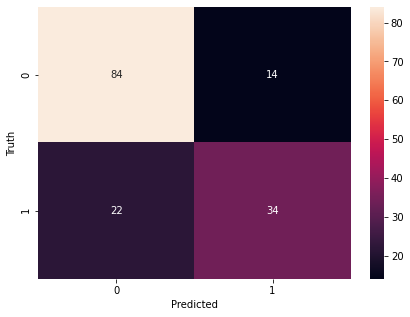

In [39]:
plt.figure(figsize=(7,5))
sn.heatmap(cm_Ridge, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Les mesures (Ridge)

In [40]:
accuracy = metrics.accuracy_score(y_test,y_predRidge)
accuracy

0.7662337662337663

In [41]:
rappel = metrics.recall_score(y_test,y_predRidge)
rappel

0.6071428571428571

In [42]:
#La précision
precision = metrics.precision_score(y_test,y_predRidge)
precision

0.7083333333333334

In [43]:
error = 1 - rc.score(x_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.233766


## 3.Modèle KNN

C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

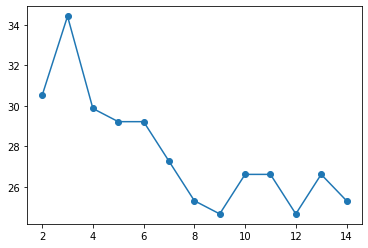

In [44]:
errors = []
for k in range(2,15):
#j'ai selectionné 15 au lien de 20 pour minimiser les calculs
    
    # on doit redéclarer le classifer à chaque itération de la boucle
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
    
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [45]:
#calculer les erreurs pour trouver le  meilleur k 
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)

error = 1-knn.score(x_test,y_test)
min = error
#On stocke la 1 ére erreur dans le min

for i in range (3,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    error = 1- knn.score(x_test,y_test)
    if (min > error) :
        min=error
        k=i
    print('Erreur :%f' % error)
min,k

Erreur :0.344156
Erreur :0.298701
Erreur :0.292208
Erreur :0.292208
Erreur :0.272727
Erreur :0.253247
Erreur :0.246753
Erreur :0.266234
Erreur :0.266234
Erreur :0.246753
Erreur :0.266234
Erreur :0.253247


C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

(0.24675324675324672, 9)

### Matrice de confusion

In [46]:
y_predKNN = knn.predict(x_test)
y_predKNN

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [47]:
cm = confusion_matrix(y_test, y_predKNN)
cm

array([[85, 13],
       [26, 30]], dtype=int64)

Text(42.0, 0.5, 'Truth')

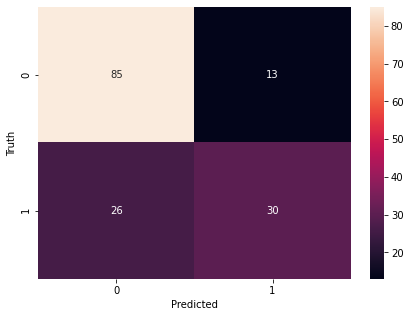

In [48]:
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Les mesures

In [49]:
accuracy = metrics.accuracy_score(y_test,y_predKNN)
accuracy

0.7467532467532467

In [50]:
rappel = metrics.recall_score(y_test,y_predKNN)
rappel

0.5357142857142857

In [51]:
#La précision
precision = metrics.precision_score(y_test,y_predKNN)
precision

0.6976744186046512

In [52]:
error = 1 - knn.score(x_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.253247


## 4.Modèle SVM

In [54]:
SVM = SVC (kernel = 'poly', random_state = 0)
SVM.fit(x_train,y_train)

C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='poly', random_state=0)

#### Matrice de confusion

In [55]:
y_pred_SVM = SVM.predict(x_test)

In [56]:
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
cm_SVM

array([[89,  9],
       [31, 25]], dtype=int64)

Text(42.0, 0.5, 'Truth')

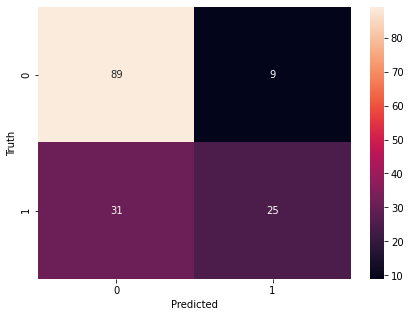

In [57]:
plt.figure(figsize=(7,5))
sn.heatmap(cm_SVM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Les mesures

In [58]:
accuracy = metrics.accuracy_score(y_test,y_pred_SVM)
accuracy

0.7402597402597403

In [59]:
rappel = metrics.recall_score(y_test,y_pred_SVM)
rappel

0.44642857142857145

In [60]:
#La précision
precision = metrics.precision_score(y_test,y_pred_SVM)
precision

0.7352941176470589

In [61]:
error = 1 - SVM.score(x_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.259740


## 5.Modèle Random Forest

In [62]:
#calculer les erreurs pour trouver le  meilleur k 
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(x_train,y_train)

error = 1-clf.score(x_test,y_test)
min= error
#On stocke la 1 ére erreur dans le min

for i in range (2,20):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(x_train,y_train)
    error = 1- clf.score(x_test,y_test)
    if (min > error) :
        min=error
        k=i
    print('Erreur :%f' % error)
min,k

Erreur :0.227273
Erreur :0.240260
Erreur :0.331169
Erreur :0.292208
Erreur :0.305195
Erreur :0.305195
Erreur :0.331169
Erreur :0.331169
Erreur :0.357143
Erreur :0.350649
Erreur :0.344156
Erreur :0.337662
Erreur :0.344156
Erreur :0.331169
Erreur :0.350649
Erreur :0.337662
Erreur :0.350649
Erreur :0.324675


(0.2272727272727273, 2)

In [63]:
clf = DecisionTreeClassifier(max_depth=k)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

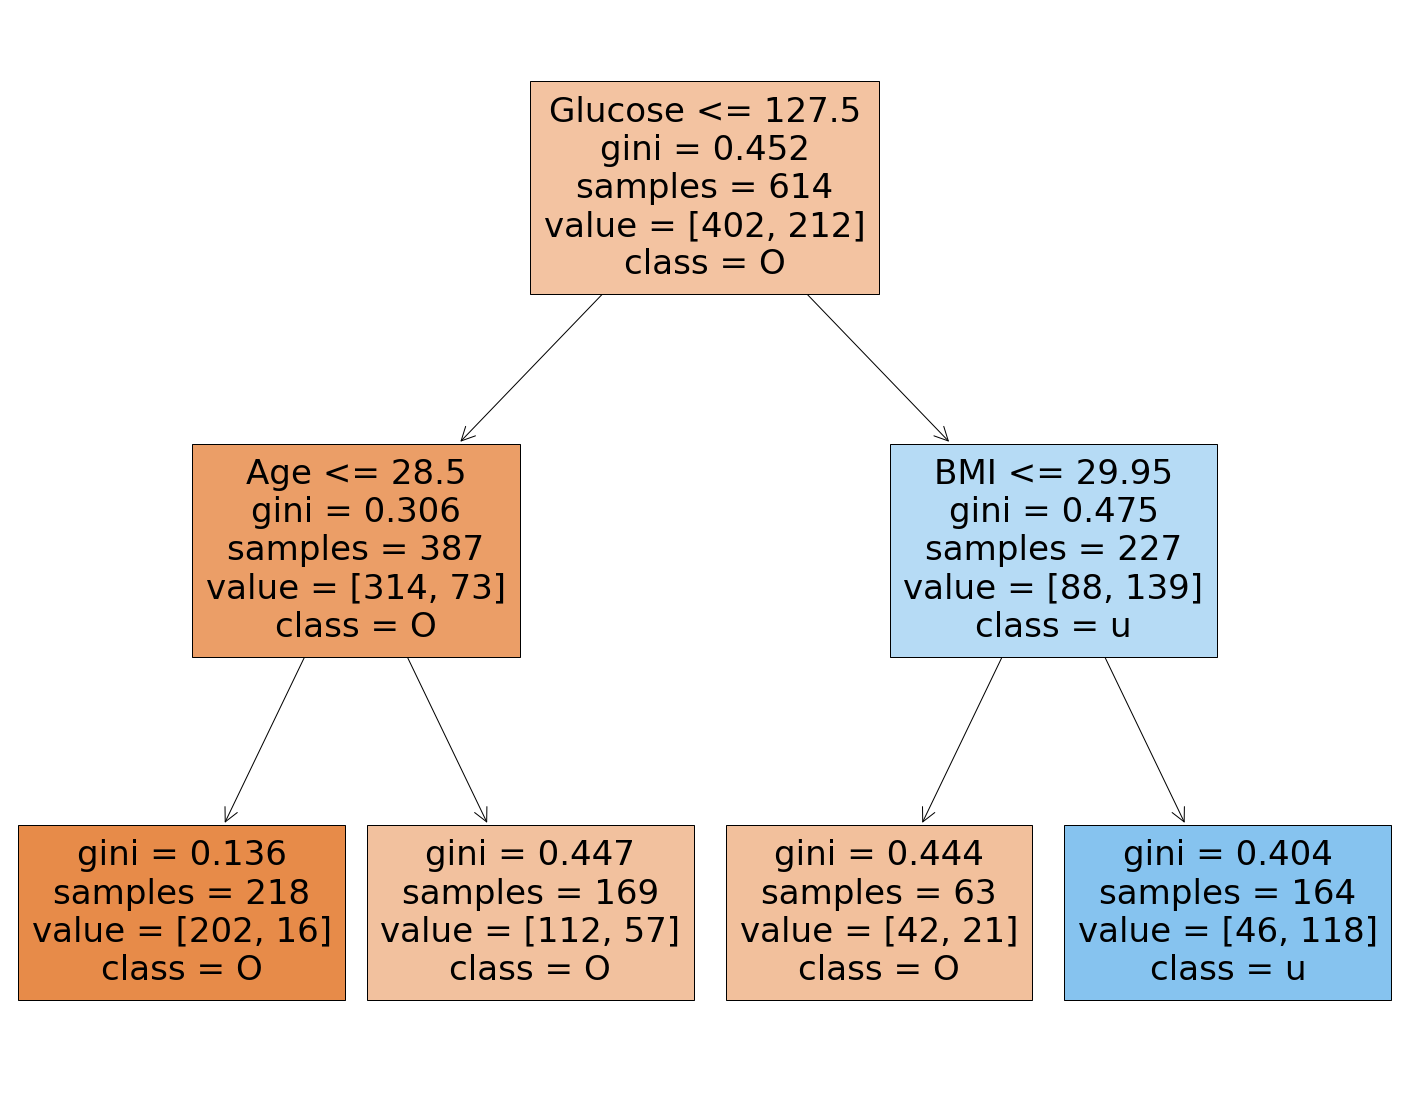

In [64]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                   'BMI','DiabetesPedigreeFunction','Age')
                   
                   ,  class_names='Outcome',filled=True)

#### Les mesures

In [65]:
y_predRandom = clf.predict(x_test)
y_predRandom

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [66]:
accuracy = metrics.accuracy_score(y_test,y_predRandom)
accuracy

0.7727272727272727

In [67]:
rappel = metrics.recall_score(y_test,y_predRandom)
rappel

0.5714285714285714

In [68]:
#La précision
precision = metrics.precision_score(y_test,y_predRandom)
precision

0.7441860465116279

### iiii. Cross validations de tous les modèles, avec la moyenne de cross_val_score de chaque modèle pour en tirer le meilleur

### Regression logistique

In [69]:
cross_val_LOG = cross_val_score(logreg,x_train,y_train,cv=5)
## cv=5 on parcourt tous le set 5 fois en séparant le test set du train set.
cross_val_LOG

C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

array([0.66666667, 0.55284553, 0.43089431, 0.62601626, 0.3442623 ])

In [70]:
cross_val_LOG.mean()

0.524137011861922

### Regression de Ridge

In [73]:
cross_val_Ridge = cross_val_score(rc,x_train,y_train,cv=5)
## cv=5 on parcourt tous le set 5 fois en séparant le test set du train set.
cross_val_Ridge

C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

array([0.78861789, 0.75609756, 0.77235772, 0.7398374 , 0.77868852])

In [74]:
cross_val_Ridge.mean()

0.767119818739171

In [75]:
cross_val_KNN = cross_val_score(knn,x_train,y_train,cv=5)
## cv=5 on parcourt tous le set 5 fois en séparant le test set du train set.
cross_val_KNN

C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

array([0.76422764, 0.71544715, 0.81300813, 0.72357724, 0.77868852])

In [76]:
cross_val_KNN.mean()

0.7589897374383581

### Modèle SVM

In [77]:
cross_val_SVM = cross_val_score(SVM,x_train,y_train,cv=5)
## cv=5 on parcourt tous le set 5 fois en séparant le test set du train set.
cross_val_SVM

C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASMAE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

array([0.77235772, 0.7398374 , 0.75609756, 0.77235772, 0.78688525])

In [78]:
cross_val_SVM.mean()

0.7655071304811409

### Modèle Random Forest

In [79]:
cross_val_Random = cross_val_score(clf,x_train,y_train,cv=5)
## cv=5 on parcourt tous le set 5 fois en séparant le test set du train set.
cross_val_Random

array([0.7804878 , 0.72357724, 0.75609756, 0.71544715, 0.79508197])

In [80]:
cross_val_Random.mean()

0.7541383446621351

#### la validation croisée calcule la précision de chaque croisement jusqu'a cv=5, puis en calculant la moyenne on obtient la meilleure précision

## Courbe de ROC des 4 modèles utilisés : 

In [81]:
fprK, tprK, thrK = metrics.roc_curve(y_test, y_predKNN)
fprLog, tprLog, thrLog = metrics.roc_curve(y_test, y_pred)
fprR, tprR, thrR = metrics.roc_curve(y_test, y_predRandom)
fprSVM,tprSVM,thRSVM = metrics.roc_curve(y_test,y_pred_SVM)

In [82]:
fig = plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

In [83]:
# auc represente combien d'espace reste sous la courbe de chaque modèle 
aucLog =  metrics.auc(fprLog, tprLog)
aucK =  metrics.auc(fprK, tprK)
aucR =  metrics.auc(fprR, tprR)
aucSVM = metrics.auc(fprSVM,tprSVM)

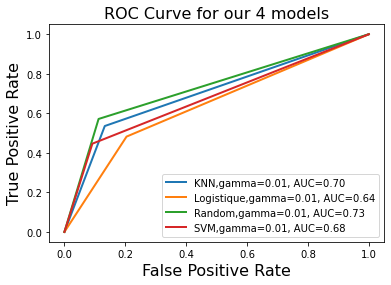

In [84]:
plt.plot(fprK, tprK, '-', lw=2, label='KNN,gamma=0.01, AUC=%.2f' % aucK)
plt.plot(fprLog, tprLog, '-', lw=2, label='Logistique,gamma=0.01, AUC=%.2f' % aucLog)
plt.plot(fprR, tprR, '-', lw=2, label='Random,gamma=0.01, AUC=%.2f' % aucR)
plt.plot(fprSVM, tprSVM, '-', lw=2, label='SVM,gamma=0.01, AUC=%.2f' % aucSVM)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve for our 4 models', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.show()

# Partie 2 : Deep Learning (les réseaux de neurones)

#### Introduction : avant de commencer à entrer nos couches, on doit d'abord, nettoyer notre dataset, et extraire juste nos entrées, et enlever les variables qui ne sont pas numériques, afin de normaliser nos données et du coup ne pas impacter nos résultats finaux, cette étape de nettoyage, on l'a deja fait auparavant dans la 1 ére partie

In [ ]:
for i in range(1,4):
    mymodel = keras.Sequential([
    layers.Dense(100, activation = 'sigmoid', input_shape = [x_train.shape[1]]),
    layers.Dropout(0.3, seed = 2),
    layers.Dense(90, activation = 'sigmoid'),  
    layers.Dense(70, activation = 'relu'),  
    layers.Dense(40, activation = 'sigmoid'),  
    layers.Dense(20, activation = 'relu'),
    layers.Dense(12, activation = 'relu'),  
    layers.Dense(10, activation = 'sigmoid'),  
    layers.Dense(9, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),  
    layers.Dense(2, activation = 'sigmoid'),  
   
    layers.Dense(1)])
    
    mymodel.compile(loss ='binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
    history2 = mymodel.fit(x_train, y_train, validation_split=0.20, epochs=90, verbose=2)
    score = mymodel.evaluate( x_test, y_test, verbose = 2)
    print(score)
    print(i)
    if( score[1]>score[0] and score[1]>=0.70):
        break

In [85]:
loaded_model = tf.keras.models.load_model("46loss76Acc.h5")
loaded_model.evaluate(x_test,y_test)
history = loaded_model.fit(x_train, y_train, validation_split=0.20, epochs=90, verbose=2)

5/5 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7922
Epoch 1/90
16/16 - 1s - loss: 0.5382 - accuracy: 0.7434 - val_loss: 0.4999 - val_accuracy: 0.7724 - 616ms/epoch - 38ms/step
Epoch 2/90
16/16 - 0s - loss: 0.5265 - accuracy: 0.7536 - val_loss: 0.5556 - val_accuracy: 0.7561 - 61ms/epoch - 4ms/step
Epoch 3/90
16/16 - 0s - loss: 0.5300 - accuracy: 0.7393 - val_loss: 0.5012 - val_accuracy: 0.7398 - 55ms/epoch - 3ms/step
Epoch 4/90
16/16 - 0s - loss: 0.5279 - accuracy: 0.7393 - val_loss: 0.5349 - val_accuracy: 0.7561 - 67ms/epoch - 4ms/step
Epoch 5/90
16/16 - 0s - loss: 0.5254 - accuracy: 0.7475 - val_loss: 0.5262 - val_accuracy: 0.7642 - 65ms/epoch - 4ms/step
Epoch 6/90
16/16 - 0s - loss: 0.5027 - accuracy: 0.7495 - val_loss: 0.5370 - val_accuracy: 0.7317 - 58ms/epoch - 4ms/step
Epoch 7/90
16/16 - 0s - loss: 0.5180 - accuracy: 0.7454 - val_loss: 0.5156 - val_accuracy: 0.7724 - 60ms/epoch - 4ms/step
Epoch 8/90
16/16 - 0s - loss: 0.4925 - accuracy: 0.7658 - v

Epoch 67/90
16/16 - 0s - loss: 0.4751 - accuracy: 0.7556 - val_loss: 0.6412 - val_accuracy: 0.6911 - 56ms/epoch - 3ms/step
Epoch 68/90
16/16 - 0s - loss: 0.4455 - accuracy: 0.8126 - val_loss: 0.4609 - val_accuracy: 0.7886 - 51ms/epoch - 3ms/step
Epoch 69/90
16/16 - 0s - loss: 0.4208 - accuracy: 0.7984 - val_loss: 0.5792 - val_accuracy: 0.7480 - 54ms/epoch - 3ms/step
Epoch 70/90
16/16 - 0s - loss: 0.4259 - accuracy: 0.7821 - val_loss: 0.5363 - val_accuracy: 0.7724 - 53ms/epoch - 3ms/step
Epoch 71/90
16/16 - 0s - loss: 0.4421 - accuracy: 0.8004 - val_loss: 0.6512 - val_accuracy: 0.7480 - 58ms/epoch - 4ms/step
Epoch 72/90
16/16 - 0s - loss: 0.4375 - accuracy: 0.8004 - val_loss: 0.5700 - val_accuracy: 0.7398 - 55ms/epoch - 3ms/step
Epoch 73/90
16/16 - 0s - loss: 0.4017 - accuracy: 0.8167 - val_loss: 0.6742 - val_accuracy: 0.7805 - 54ms/epoch - 3ms/step
Epoch 74/90
16/16 - 0s - loss: 0.4357 - accuracy: 0.7923 - val_loss: 0.7176 - val_accuracy: 0.7236 - 57ms/epoch - 4ms/step
Epoch 75/90
16/1

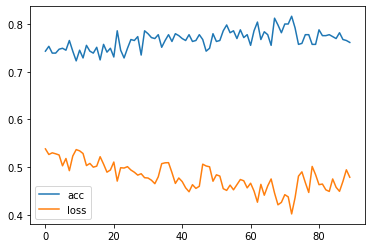

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['acc','loss'])
plt.show()

#### on prend l'accuracy de notre meilleur modèle du machine learning (Random Forest)

In [88]:
accuracy = metrics.accuracy_score(y_test,y_predRandom)
accuracy
#accuracy de random forest

0.7727272727272727

In [89]:
y_pred_Deep = loaded_model.predict(x_test)

In [90]:
fprDeep,tprDeep,thRDeep = metrics.roc_curve(y_test,y_pred_Deep)
fprRand,tprRand,thRandom = metrics.roc_curve(y_test,y_predRandom)

In [91]:
aucR =  metrics.auc(fprRand, tprRand)
aucDeep = metrics.auc(fprDeep,tprDeep)

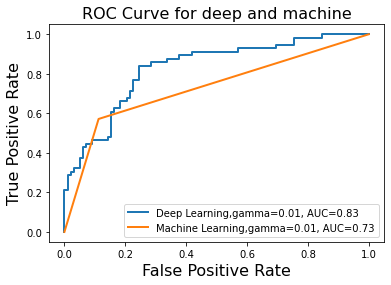

In [92]:
plt.plot(fprDeep, tprDeep, '-', lw=2, label='Deep Learning,gamma=0.01, AUC=%.2f' % aucDeep)
plt.plot(fprR, tprR, '-', lw=2, label='Machine Learning,gamma=0.01, AUC=%.2f' % aucR)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve for deep and machine', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.show()

In [96]:
import pickle

In [97]:
with open('mypickle.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [98]:
print(f)

<_io.BufferedWriter name='mypickle.pickle'>
